In [118]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [119]:
#utilizado para manejos de directorios y rutas
import os

#Computacion vectorial y cientifica para python
import numpy as np

#Librerias para graficación
from matplotlib import pyplot
# Necesario para graficar superficies 3D
from mpl_toolkits.mplot3d import Axes3D

#llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [120]:
#Cargar y leer datos
data = np.loadtxt('/content/gdrive/MyDrive/regresion_polinomial.csv', delimiter=";",skiprows=1)
#print(data)
X = data[:, :1]
y = data[:, 1]
m = y.size

for i in range(26):
    print('{:8.0f}{:10.0f}'.format(X[i, 0], y[i]))

       2        36
       5       114
       4       119
       5        94
       2        43
       3        73
       1        17
       2        56
       5       115
       2        51
       4       114
       2        41
       5       150
       3        47
       2        42
       4        98
       4       118
       2        45
       2        45
       3        70
       2        56
       1        26
       5       119
       4        77
       5       134
       5       145


In [121]:
#definicion de funcion que grafica los puntos x & y
def plotData(x, y):
    #abre una nueva figura
    fig = pyplot.figure()  
    
    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Cantidad')
    pyplot.xlabel('Costo Bubble Tea 1,000s')

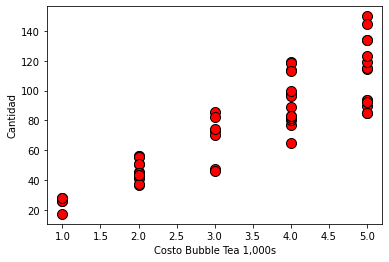

In [122]:
plotData(X, y)

In [123]:
X = np.concatenate([X, X * X], axis=1)

In [124]:
print(X)

[[ 2.  4.]
 [ 5. 25.]
 [ 4. 16.]
 [ 5. 25.]
 [ 2.  4.]
 [ 3.  9.]
 [ 1.  1.]
 [ 2.  4.]
 [ 5. 25.]
 [ 2.  4.]
 [ 4. 16.]
 [ 2.  4.]
 [ 5. 25.]
 [ 3.  9.]
 [ 2.  4.]
 [ 4. 16.]
 [ 4. 16.]
 [ 2.  4.]
 [ 2.  4.]
 [ 3.  9.]
 [ 2.  4.]
 [ 1.  1.]
 [ 5. 25.]
 [ 4. 16.]
 [ 5. 25.]
 [ 5. 25.]
 [ 3.  9.]
 [ 5. 25.]
 [ 1.  1.]
 [ 1.  1.]
 [ 2.  4.]
 [ 2.  4.]
 [ 4. 16.]
 [ 4. 16.]
 [ 4. 16.]
 [ 4. 16.]
 [ 3.  9.]
 [ 4. 16.]
 [ 5. 25.]
 [ 1.  1.]
 [ 5. 25.]
 [ 2.  4.]
 [ 2.  4.]
 [ 5. 25.]
 [ 4. 16.]
 [ 5. 25.]
 [ 2.  4.]
 [ 4. 16.]
 [ 4. 16.]
 [ 3.  9.]
 [ 3.  9.]
 [ 2.  4.]
 [ 1.  1.]
 [ 4. 16.]
 [ 5. 25.]
 [ 5. 25.]]


In [125]:
#definicion de funcion que calcula la desviacion estandar
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [126]:
#llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

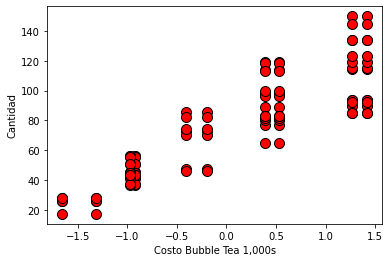

In [127]:
plotData(X_norm, y)

In [128]:
#Añade el termino de interseccion a X
#(Columna de 1's para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)
print(X)

[[ 1.         -0.92599069 -0.9736597 ]
 [ 1.          1.26508587  1.41678666]
 [ 1.          0.53472702  0.39230965]
 [ 1.          1.26508587  1.41678666]
 [ 1.         -0.92599069 -0.9736597 ]
 [ 1.         -0.19563184 -0.4045058 ]
 [ 1.         -1.65634954 -1.31515203]
 [ 1.         -0.92599069 -0.9736597 ]
 [ 1.          1.26508587  1.41678666]
 [ 1.         -0.92599069 -0.9736597 ]
 [ 1.          0.53472702  0.39230965]
 [ 1.         -0.92599069 -0.9736597 ]
 [ 1.          1.26508587  1.41678666]
 [ 1.         -0.19563184 -0.4045058 ]
 [ 1.         -0.92599069 -0.9736597 ]
 [ 1.          0.53472702  0.39230965]
 [ 1.          0.53472702  0.39230965]
 [ 1.         -0.92599069 -0.9736597 ]
 [ 1.         -0.92599069 -0.9736597 ]
 [ 1.         -0.19563184 -0.4045058 ]
 [ 1.         -0.92599069 -0.9736597 ]
 [ 1.         -1.65634954 -1.31515203]
 [ 1.          1.26508587  1.41678666]
 [ 1.          0.53472702  0.39230965]
 [ 1.          1.26508587  1.41678666]
 [ 1.          1.26508587

In [129]:
#definicion de funcion para calcular el costo
def computeCostMulti(X, y, theta):
    #Inicializa algunos valores que seran utiles
    m = y.shape[0] #numero de ejemplos de entrenamiento
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [130]:
#definicion de funcion para calcular el descenso por el gradiente
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    #Inicializa algunos valores 
    m = y.shape[0] # numero de ejemplos de entrenamiento
    
    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))
    return theta, J_history

theta calculado por el descenso por el gradiente: [75.1525     33.23122738 -2.71545658]
El costo para 6 bubble tea es de: $838


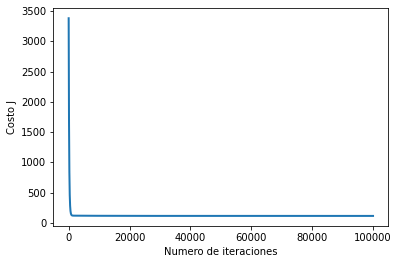

In [131]:
#Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.003
num_iters = 100000

#inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

#Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

#Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

#El costo para 6 bubble tea
X_array = [6, 20.8, 136]
X_array[1:3] = (X_array[1:3] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El costo para 6 bubble tea es de: ${:.0f}'.format(price))

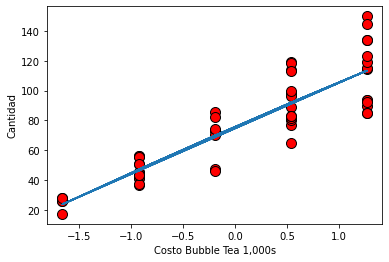

In [132]:
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')